In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# if using gpus to run ANN, allocates only certain amount of GPU memory towards ANN
gpu_list = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpu_list:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
# loading and processing CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# creating training, validation, and testing datasets
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [3]:
# building the model
input_layer = Input(shape = (32, 32, 3))
conv_1 = Conv2D(64, (3, 3), 1, activation = 'relu')(input_layer)
batchnorm_1 = BatchNormalization()(conv_1)
maxpool_1 = MaxPooling2D()(batchnorm_1)
conv_2 = Conv2D(128, (3, 3), 1, activation = 'relu')(maxpool_1)
batchnorm_2 = BatchNormalization()(conv_2)
maxpool_2 = MaxPooling2D()(batchnorm_2)
conv_3 = Conv2D(256, (3, 3), 1, activation = 'relu')(maxpool_2)
batchnorm_3 = BatchNormalization()(conv_3)
maxpool_3 = MaxPooling2D()(batchnorm_3)
flatten = Flatten()(maxpool_3)
dropout_1 = Dropout(0.5)(flatten)
dense1 = Dense(512, activation = 'relu')(dropout_1)
dropout_2 = Dropout(0.5)(dense1)
output_layer = Dense(10, activation='softmax')(dropout_2)

model = Model(inputs = input_layer, outputs = output_layer)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 30, 30, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 128)       512

In [4]:
# training the model
trained_model = model.fit(x_train, y_train, epochs = 20, validation_data = (x_val, y_val))

Epoch 1/20


1250/1250 [==============================] - 57s 44ms/step - loss: 1.7602 - accuracy: 0.4024 - val_loss: 1.3684 - val_accuracy: 0.5034
Epoch 2/20
1250/1250 [==============================] - 47s 37ms/step - loss: 1.3303 - accuracy: 0.5261 - val_loss: 1.2896 - val_accuracy: 0.5304
Epoch 3/20
1250/1250 [==============================] - 53s 42ms/step - loss: 1.1779 - accuracy: 0.5845 - val_loss: 1.1878 - val_accuracy: 0.5755
Epoch 4/20
1250/1250 [==============================] - 60s 48ms/step - loss: 1.0885 - accuracy: 0.6210 - val_loss: 1.3530 - val_accuracy: 0.5429
Epoch 5/20
1250/1250 [==============================] - 69s 55ms/step - loss: 1.0065 - accuracy: 0.6535 - val_loss: 1.0118 - val_accuracy: 0.6385
Epoch 6/20
1250/1250 [==============================] - 69s 55ms/step - loss: 0.9375 - accuracy: 0.6741 - val_loss: 0.9676 - val_accuracy: 0.6811
Epoch 7/20
1250/1250 [==============================] - 66s 52ms/step - loss: 0.8892 - accuracy: 0.6945 - val_loss: 0.9323

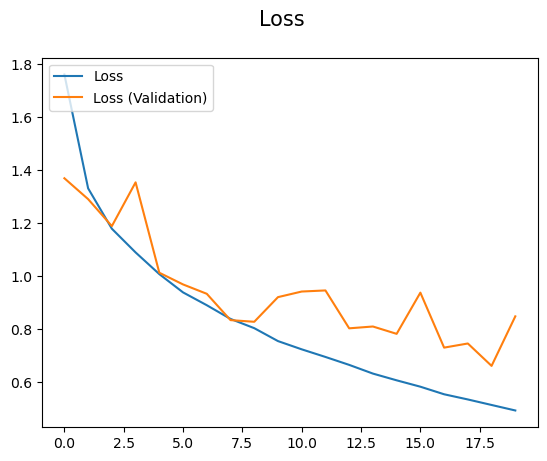

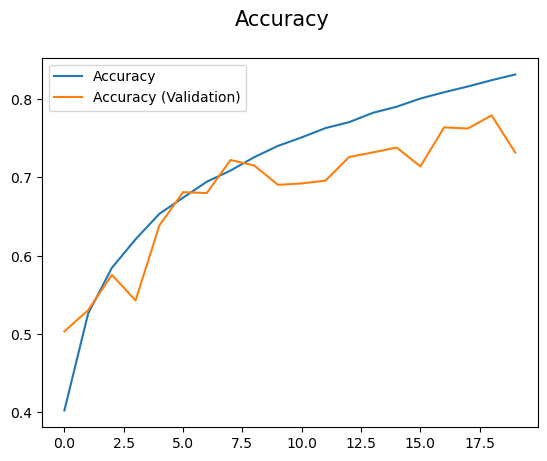

In [5]:
# plotting loss function
fig = plt.figure()
plt.plot(trained_model.history['loss'], label = 'Loss')
plt.plot(trained_model.history['val_loss'], label = 'Loss (Validation)')
fig.suptitle('Loss', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

# plotting accuracy function
fig = plt.figure()
plt.plot(trained_model.history['accuracy'], label = 'Accuracy')
plt.plot(trained_model.history['val_accuracy'], label = 'Accuracy (Validation)')
fig.suptitle('Accuracy', fontsize = 15)
plt.legend(loc = "upper left")
plt.show()

In [6]:
# evaluating accuracy on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

313/313 [==============================] - 5s 16ms/step - loss: 0.8417 - accuracy: 0.7345
Test Accuracy: 73.45%


1/1 [==============================] - 0s 41ms/step


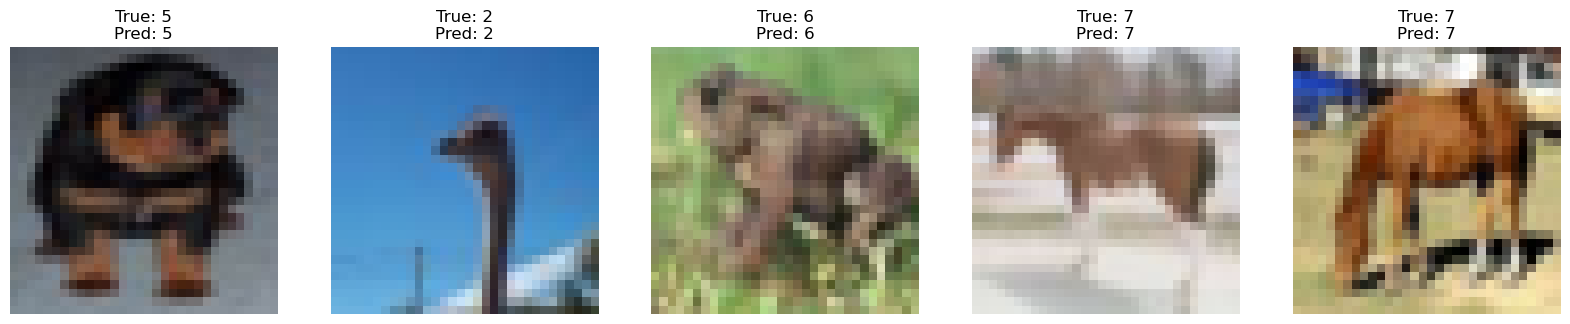

In [7]:
# making predictions on 5 sample images
plt.figure(figsize = (20, 20))
for i in range(5):
    random_index = np.random.randint(0, len(x_test))
    random_image = x_test[random_index]
    true_label = np.argmax(y_test[random_index])

    # preparing the image for the model
    random_image = random_image.reshape((1, 32, 32, 3)) 
    prediction = model.predict(random_image)
    predicted_label = np.argmax(prediction)

    # displaying each image
    plt.subplot(1, 5, i + 1)
    plt.imshow(random_image.squeeze())
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.show()
